In [2]:
#Bibliothèques nécessaires
import numpy as np
import matplotlib.pyplot as plt
import sounddevice as sd
import time

In [4]:
#Ecriture du message de l'Agent
Message = str(input('Entrez le message à envoyer (5 à 10 caractères) : '))
print(Message) #Affiche le message écrit par l'agent

BONJOUR


In [5]:
#Conversion du message texte en binaire via la table ASCII
total_binaire = '' #Création liste total_binary
for i in range(len(Message)):
    binaire = ''   #Création liste binary
    string_ord = ord(Message[i])  #Renvoie le décimal correspondant à chaque caratère de la chaîne de caractères
    while string_ord > 0:   #Boucle tant qu'il y a un caractère
        x = string_ord % 2
        string_ord = string_ord // 2
        binaire = str(x) + str(binaire)
    total_binaire += binaire #Concaténation des valeurs binaires (si plusieurs caractères à traiter)

print(total_binaire) #Affiche la liste total_binary, soit la valeur binaire égale à la valeur décimale associée à la chaîne de caractères

1000010100111110011101001010100111110101011010010


In [6]:
#Définition de la fonction XOR utilisée pour la division
def xor(a, b):
    resultat = [] #Initialisation du résultat
    for i in range(1, len(b)): #Boucle pour appliquer la fonction XOR (si les bits sont les mêmes, alors XOR vaut 0, sinon XOR vaut 1)
        if a[i] == b[i]:
            resultat.append('0')
        else:
            resultat.append('1')
    return ''.join(resultat) #On retourne les données de la fonction XOR sous forme d'une chaîne de caractères

#Définition de la fonction division euclidienne
def Division_eucl(dividende, diviseur):
    val = len(diviseur)
    tmp = dividende[0 : val]
    while val < len(dividende):
        if tmp[0] =='1':
            tmp = xor(diviseur, tmp) + dividende[val]
        else:
            tmp = xor('0' * val, tmp) + dividende[val]
        val +=  1
    if tmp[0] =='1':
        tmp = xor(diviseur, tmp)
    else:
        tmp = xor('0' * val, tmp)
    check = tmp
    return check

#Définition de la fonction d'encodage CRC (total_binary + 'N-bits 0', G (le polynôme générateur))
def encodage(data, key):
    long_key = len(key)
    data_ajout = data + '0'*(long_key-1)
    reste = Division_eucl(data_ajout, key)
    data_encode = data + reste
    return data_encode

#Fonction Main
data = total_binaire + '0000'
key = '1001' #Diviseur CRC fixé à 1001, G(x) = x^3 + 1
print("Les données à envoyer sont :", data) #Affiche la valeur binaire à envoyer
time.sleep(1) #Utilisation de la bibliothèque time pour laisser le temps à l'agent de prendre connaissance des données à envoyer et du diviseur
print("Le diviseur CRC est :", key) #Affiche le diviseur CRC utilisé
time.sleep(2) #Utilisation de la bibliothèque time pour simuler une réflexion de la machine
data_crc = encodage(data, key)
print("Les données encodées avec la clé sont :", data_crc) #Affiche la valeur binaire concaténée avec la clé calculée

Les données à envoyer sont : 10000101001111100111010010101001111101010110100100000
Le diviseur CRC est : 1001
Les données encodées avec la clé sont : 10000101001111100111010010101001111101010110100100000000


In [7]:
#Création d'une liste de booléens correspondant à data_crc (False pour '0', True pour '1')
message_bool = []
for i in range(0, len(data_crc),1):
    if data_crc[i] =='1':
        message_bool.append(True)
    if data_crc[i] =='0':
        message_bool.append(False)
print(message_bool) #Affiche la liste de booléens

#Codage Manchester du message
message_code = []
for ii in range(0, len(message_bool)):
    if message_bool[ii] == True:
        message_code.extend([int(1)])
        message_code.extend([int(0)])
    if message_bool[ii] == False:
        message_code.extend([int(0)])
        message_code.extend([int(1)])
print(message_code) #Affiche le message codé Manchester

[True, False, False, False, False, True, False, True, False, False, True, True, True, True, True, False, False, True, True, True, False, True, False, False, True, False, True, False, True, False, False, True, True, True, True, True, False, True, False, True, False, True, True, False, True, False, False, True, False, False, False, False, False, False, False, False]
[1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1]


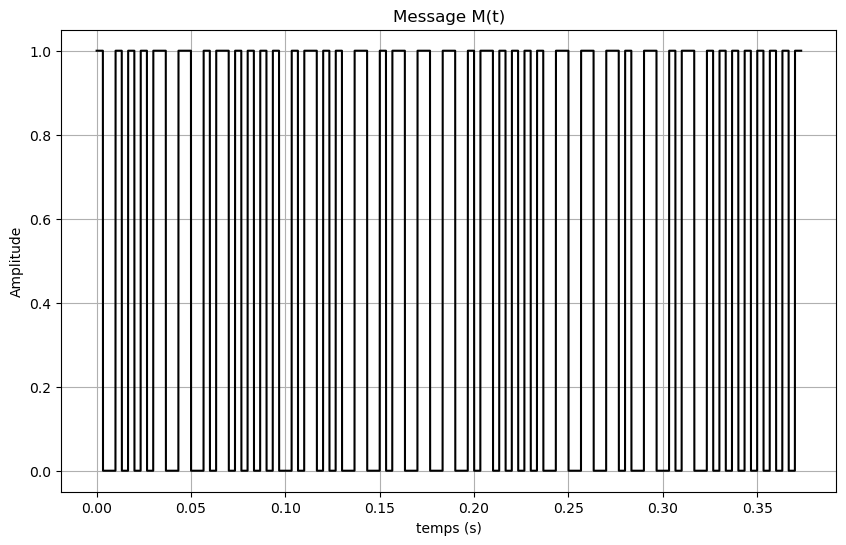

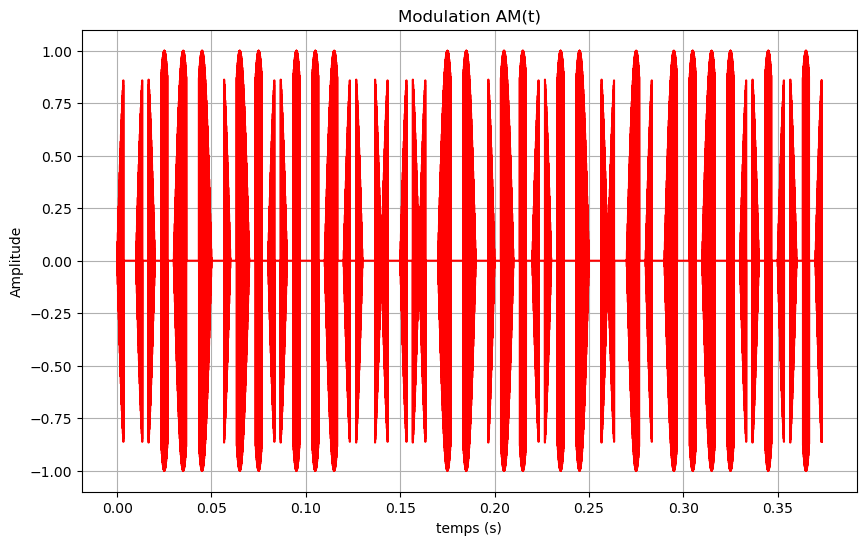

In [8]:
#Modulation ASK du message
M = message_code
Fe = 44100 #Fréquence d'échantillonnage
Fp = 22000 #Fréquence de la porteuse 
baud = 300 #Débit binaire
Nbits = len(M) #Nombre de bits initial
Ns = Fe / baud #Nombre de symboles par bit
N = Nbits * Ns #Nombre total de bits à moduler

#On génère le message binaire dupliqué
M_duplique = np.repeat(M, Ns)

#On génère le vecteur temps
t = np.arange (0.0, N) / Fe

#On génère la porteuse P(t)
Ap = 1 #Amplitude de la porteuse
Porteuse = Ap * np.sin(2 * np.pi * Fp * t) #Fonction de la porteuse

#On réalise la modulation en amplitude (ASK)
ASK = Porteuse * M_duplique


#Affichage Message binaire et modulation
plt.figure (figsize = (10,6))
plt.plot(t, M_duplique, 'Black')
plt.title('Message M(t)')
plt.xlabel('temps (s)')
plt.ylabel('Amplitude')
plt.grid()

plt.figure (figsize = (10,6))
plt.plot(t, ASK, 'r')
plt.title('Modulation AM(t)')
plt.xlabel('temps (s)')
plt.ylabel('Amplitude')
plt.grid()

In [9]:
#Émission du message sous forme de signal (Jouer le son)
sd.play(ASK, Fe)

In [10]:
message = "Le message est en cours de transmission..."

for char in message:
    print(char, end='', flush=True)
    time.sleep(0.1)  #Ajuster la durée selon préférences
print()

Le message est en cours de transmission...


In [11]:
nmessage = "Le message est en cours de réception..."

for char in nmessage:
    print(char, end='', flush=True)
    time.sleep(0.1)  #Ajuster la durée selon préférences

Le message est en cours de réception...

[ 0.          0.00712373 -0.0142471  ... -0.85514276  0.85881395
 -0.86244156]


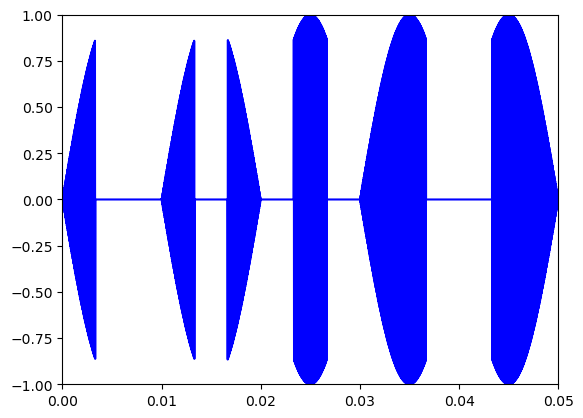

In [12]:
#Démodulation ASK du signal
Fe = 44100
Fp = 22000
baud = 300
N = len(ASK)
Ns = Fe / baud

t = np.arange (0.0, N)/Fe

Porteuse = np.sin(2 * np.pi * Fp * t)
Produit = ASK * Porteuse #Produit du signal modulé et de la porteuse pour obtenir le signal démodulé

#Intégration
y = []
for i in range(0,int(N), int(Ns)):
    y.append(np.trapz(Produit[i:i+int(Ns)], t[i:i+int(Ns)])) #Utilisation de la méthode des trapèzes

plt.plot(t, ASK, 'b')
plt.axis([0, 0.05, -1, 1])
print(ASK) #Affiche le signal démodulé

In [13]:
#Décodage Manchester
message_demodule = np.array(y)>0

message_recu_decode = [] #Initialisation de la liste pour stocker les valeurs binaires à partir du signal démodulé
for iii in range(0, len(message_demodule)):
    if message_demodule[iii] == True:
        message_recu_decode.extend([int(1)])
    if message_demodule[iii] == False:
        message_recu_decode.extend([int(0)])

message_recu_bin = [] #Initialisation de la liste pour stocker les valeurs binaires à partir de la liste message_recu_decode
for iiii in range(0, len(message_demodule), 2):
    if message_recu_decode[iiii] == 1 and message_recu_decode[iiii+1] == 0:
        message_recu_bin.extend([str(1)])
    if message_recu_decode[iiii] == 0 and message_recu_decode[iiii+1] == 1:
        message_recu_bin.extend([str(0)])
print(message_recu_bin) #Affichage de la liste du décodage Manchester

['1', '0', '0', '0', '0', '1', '0', '1', '0', '0', '1', '1', '1', '1', '1', '0', '0', '1', '1', '1', '0', '1', '0', '0', '1', '0', '1', '0', '1', '0', '0', '1', '1', '1', '1', '1', '0', '1', '0', '1', '0', '1', '1', '0', '1', '0', '0', '1', '0', '0', '0', '0', '0', '0', '0', '0']


In [14]:
#conversion liste en chaine de caractère
message_receptionne =''.join(message_recu_bin)
print(message_receptionne) #Affiche la chaîne de caractères à partir de la liste message_recu_bin

10000101001111100111010010101001111101010110100100000000


In [15]:
#Définition de la fonction de décodage
def decodage(data_crc, key):
    long_key = len(key)
    data_ajout = data_crc + '0' * (long_key-1)
    reste = Division_eucl(data_ajout, key)
    return reste

key = '1001'
check = decodage(message_receptionne, key)                      #Récupération du reste de la division euclidienne du message réceptionné par la clé
print("Le reste de la division après décodage est -> " + check)
temp = "0" * (len(key) - 1)                                     #Récupération du message de base
if check == temp:
    print("Les données -> " + data + " <- ont bien été reçues!")
else:
    print("Erreur de réception")

Le reste de la division après décodage est -> 000
Les données -> 10000101001111100111010010101001111101010110100100000 <- ont bien été reçues!


In [16]:
#Définition de la fonction de conversion du binaire en décimale
def BinaryToDecimal(binary):  
    #initialisation des variables
    decimal = 0
    i = 0
    n = 0
    while(binary != 0): 
        dec = binary % 10
        decimal = decimal + dec * pow(2, i) 
        binary = binary//10
        i += 1
    return (decimal)

#Conversion du message binaire en texte via la table ASCII
Total_texte = ''
for i in range(0, len(message_receptionne), 7):
    bin_data = int(message_receptionne[i:i+7])
    decimal_data = BinaryToDecimal(bin_data)
    Total_texte = Total_texte + chr(decimal_data)

In [17]:
#Affichage du message
print(Total_texte)

BONJOUR 


In [18]:
verification = int(check,2)
FeA = 44100
t = np.arange(0, 0.2, 1 / FeA)
Accusé_réception = np.sin(2 * np.pi * 5000 * t)
if verification == 0:
    sd.play(Accusé_réception, FeA)   #Émission du message sous forme de signal